In [1]:
import os
import sys 

os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.sql.warehouse.dir", "C:/Users/JSM")\
    .getOrCreate()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
('A=', array([[1.4, 1. ],
       [1.4, 1. ],
       [1.3, 1. ],
       [1.5, 1. ],
       [1.4, 1. ]]), 'y=', 0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal_width, dtype: float64)
[[1.4 1. ]
 [1.4 1. ]
 [1.3 1. ]
 [1.5 1. ]
 [1.4 1. ]]
                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           5.78e-86
Time:              

C:\Users\JSM\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


-0.36651404521672704 [0.41641913 0.        ]


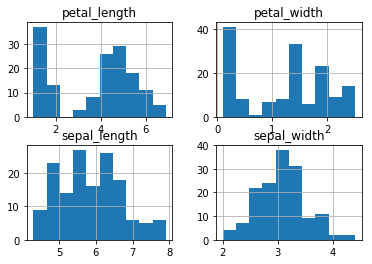

In [12]:
#홍채 회귀분석을 통한 전체적인 회귀

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

iris.info()
iris.head()
iris.describe()
iris.isnull().sum()#결측값 확인

%matplotlib inline
iris.hist()

##numpy regression

import numpy as np
x=iris["petal_length"]
y=iris["petal_width"]
A=np.array([x,np.ones(len(x))])

print("A=", A.T[:5],"y=",y[:5])

Av = np.vander(x, 2)  #add a constant row for an intercept
print(Av[:5])
np.linalg.lstsq(Av,y)

#statsmodel regression

import statsmodels.api as sm

model = sm.OLS(y, A.T)

results = model.fit()

print(results.summary())

#sklearn regression
from sklearn.linear_model import LinearRegression
x = iris["petal_length"]
y = iris["petal_width"]
A=np.array([x,np.ones(len(x))])

model = LinearRegression()

results = model.fit(A.T, y)

print results.intercept_, results.coef_

NameError: name 'y' is not defined